In [1]:
import torch
import json

from torchvision import models # modelos pre-treinados
from torchvision import transforms # transformações de imagens
from PIL import Image # manipulação de imagens

In [2]:
# maiusculas são classes, minusculas são funções
# dir(models) # lista os modelos disponíveis
dir(models)[:10]

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights']

In [3]:
dispositivo = torch.device("cuda" if torch.cuda.is_available() else "cpu") # verifica se a GPU está disponível
alexnet = models.AlexNet() # carrega o modelo AlexNet
alexnet.to(dispositivo) # carrega o modelo AlexNet na GPU

resnet = models.resnet101() # carrega o modelo ResNet101, 101 layers convolucionais
resnet.to(dispositivo) # carrega o modelo ResNet101 na GPU

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
preprocessamento = transforms.Compose(
    [
        transforms.Resize(256),  # redimensiona a imagem para 256x256
        transforms.CenterCrop(224),  # corta a imagem para 224x224
        transforms.ToTensor(),  # converte a imagem para um tensor
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),  # normaliza a imagem com a média e desvio padrão da ImageNet dataset
    ]
)

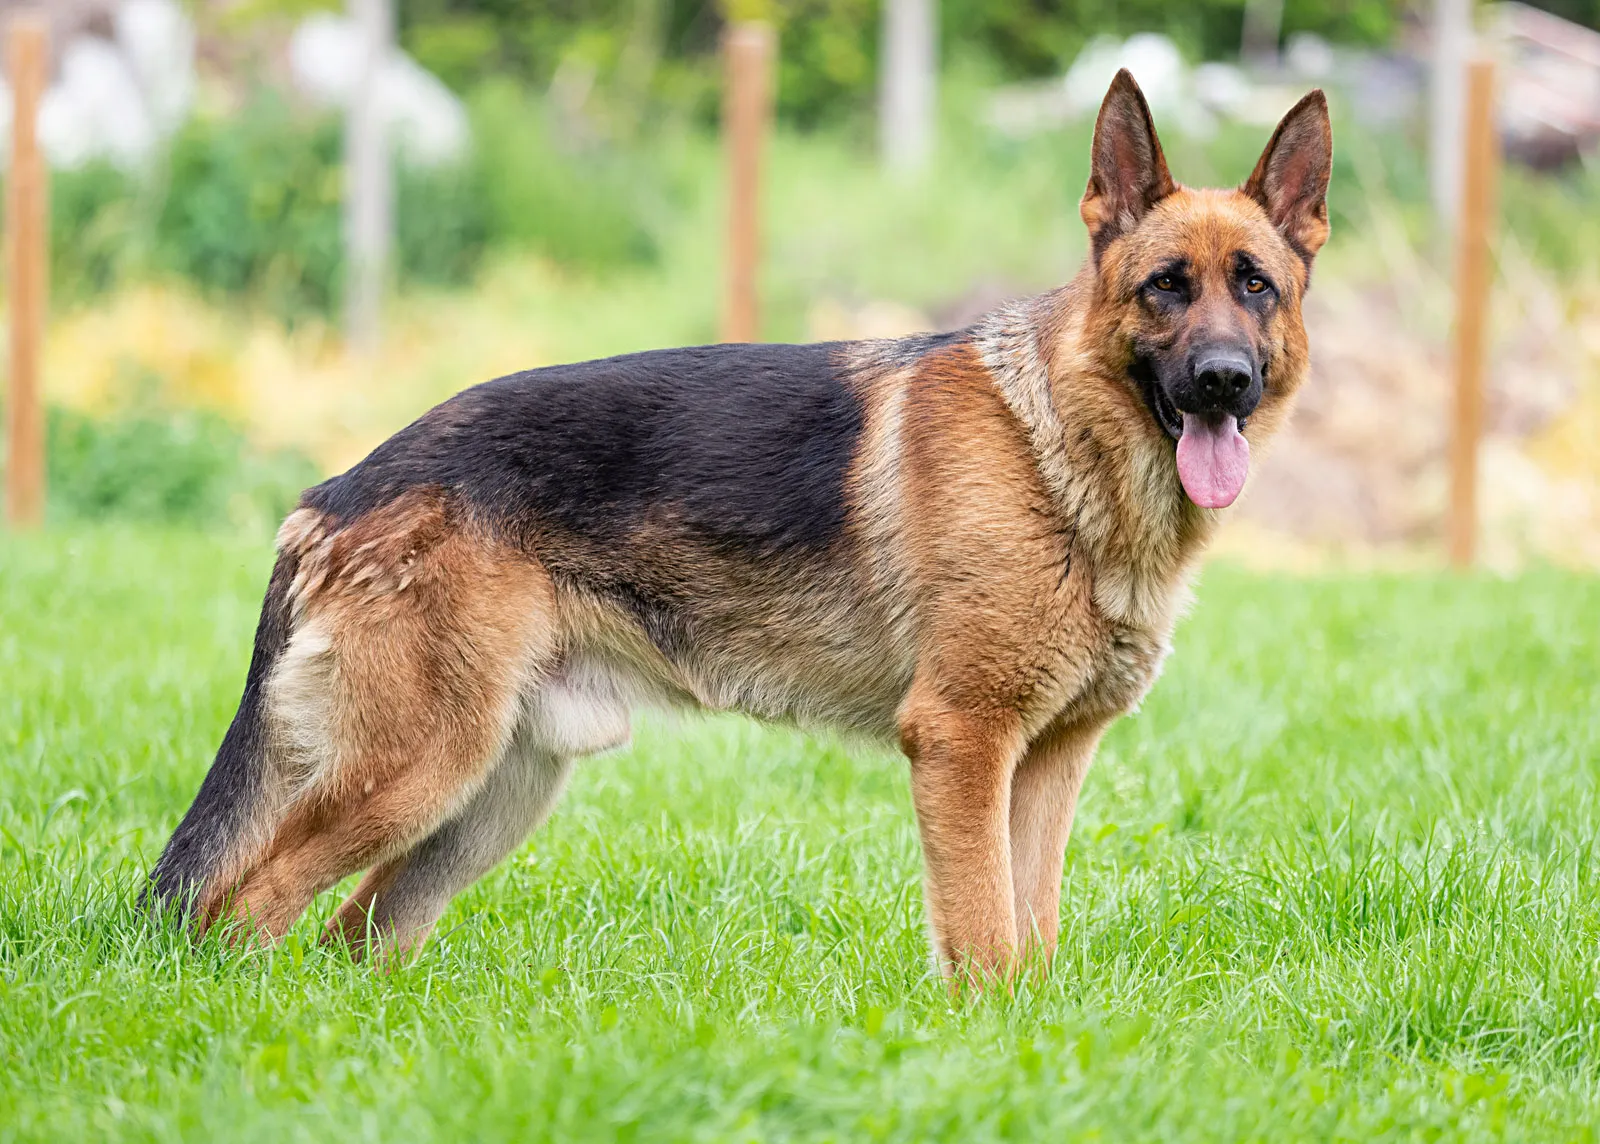

In [5]:
luke = Image.open("./imagens/cachorros/German-Shepherd-dog-Alsatian.webp")
display(luke)

In [6]:
luke_t = preprocessamento(luke) # aplica o preprocessamento na imagem
luke_t = luke_t.to(dispositivo) # carrega a imagem na GPU

In [7]:
batch_t = luke_t.unsqueeze(0)  # adiciona uma dimensão extra para representar o batch

In [8]:
resnet.eval()  # coloca o modelo em modo de avaliação - desativa o dropout e batch normalization

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
output = resnet(batch_t)  # passa a imagem pelo modelo

In [10]:
imagenet_json = json.load(open("./imagenet_class_index.json"))

In [11]:
_, index = torch.max(output, 1)

In [12]:
imagenet_json[f'{index.item()}']

['n03127925', 'crate']

In [13]:
porcentagem = torch.nn.functional.softmax(output, dim=1)[0] # probabilidade de cada classe
f'{ porcentagem[index].item() * 100}%' 

'100.0%'